# Exploratory Data Analysis on Drone Data
#### Name: Arunava Munshi
#### Date: 03-Oct-2018
#### Platform: Python 3 and Jupyter notebook
#### Libraries used: 
* String (for String Processng)
* nltk - natural language toolkit (tokenizer, lemmatizer, stopwords, collocations and probabilities)
* re (for regular expression, included in Anaconda Python 2.7) 
* itertools (for iterations)
* collections (for Collocations)

This project is regarding d exploratort data analysis andata cleansing. So, here the primary aim is to find and fix incorrect and missing data in the dataset and do proper imputation into them. After, data cleasing and imputation, proper insigts is expected through sophisticated ML technique.

## Importing the given Dataset
The Dataset "raw_data.csv" is given as part of the analysis of this assignment. Becasue, this is a CSV file, so read_csv() function would be appropriate in this case.

In [1]:
import pandas as pd
drone_data_df = pd.read_csv("raw_data.csv")
drone_data_df.head()

Id  Drone Type  Post Type  Package Weight  Origin Region  \
0  ID5602462801         1.0        1.0          15.551           11.0   
1  ID1300927571         3.0        0.0          39.946            1.0   
2  ID1546040380         1.0        0.0          27.318           28.0   
3  ID5907964140         3.0        1.0          32.807           44.0   
4  ID1827924427         2.0        0.0          15.092           11.0   

   Destination Region  Origin Latitude  Origin Longitude  \
0                13.0       -38.846723        144.509896   
1                42.0       -37.213989        145.480693   
2                33.0       -38.949516        143.195081   
3                30.0       -36.639102        143.687419   
4                36.0       -38.977816        144.655199   

   Destination Latitude  Destination Longitude  Journey Distance  \
0            -37.844835             147.136302           254.965   
1            -38.268251             146.288845           137.234   
2            -37.807255             146.019944           277.353   
3            -38.519730             148.214020           450.804   
4            -36.967616             146.609136           281.890   

  Departure Date Departure Time  Travel Time Delivery Time  Delivery Fare  
0     2018-06-15       21:36:44       253.68       1:50:24         159.20  
1     2018-01-27       23:23:03       119.64       1:22:41         192.37  
2     2018-02-01       15:44:24       275.34      20:19:44         113.92  
3     2018-03-02       10:39:01       377.37      16:56:23         218.12  
4     2018-03-03       02:12:55       238.68       6:11:35         157.05

## Initial Analysis
Let's do some initial level of analysis on this data to get some initial insights.
### Getting the initial information
#### Getting the number of Null Values in each column

In [2]:
drone_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38539 entries, 0 to 38538
Data columns (total 16 columns):
Id                       38520 non-null object
Drone Type               38529 non-null float64
Post Type                38519 non-null float64
Package Weight           38539 non-null float64
Origin Region            38529 non-null float64
Destination Region       38529 non-null float64
Origin Latitude          38539 non-null float64
Origin Longitude         38539 non-null float64
Destination Latitude     38539 non-null float64
Destination Longitude    38539 non-null float64
Journey Distance         38539 non-null float64
Departure Date           38539 non-null object
Departure Time           38539 non-null object
Travel Time              38499 non-null float64
Delivery Time            38539 non-null object
Delivery Fare            38509 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.7+ MB


So we can see that, there are 30 columns and 38539 rows in the CSV file. But it can be observed that the count of all rows are not same and the count of some rows are beow 38539, so there must be Null values in the some rows. Let's check for Null values then.
#### Checking Null Values in Different Columns

In [3]:
drone_data_df.isnull().sum()

Id                       19
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

So we see that among all columns 'Id', 'Drone Type', 'Post Type', 'Origin Region', 'Destination Region', 'Travel Time' and 'Delivery Fare' have null values and rest of the colums don't have null values. Also from general sense it can be prdicted that the below data are independent but can impact one or more than one data -
* Id
* Package Weight
* Origin Latitude
* Origin Longitude
* Destination Latitude
* Destination Longitude
* Departure Date
* Departure time
* Delivery Time

And the below data are dependent on the other data items from the initial analysis-
* **Drone Type:** From the specification document it is known that the drone type is dependent on its  takeOff, onRoute, and Landing speeds, which in turn depends on the columns 'Distance' and 'Travel time'.
* **Post Type:** Post type could be dependent on any other data item that is yet to be explored.
* **Origin region:** Origin region is directly related to 'Origin latitude' and 'Origin longitude'.
* **Destination region:** Destination region is directly related to 'Destination latitude' and 'Destination longitude'.
* **Distance:** Distances quite clearly dependent on 'Origin latitude' & 'Origin longitude' and 'Destination latitude' & 'Destination longitude'.
* **Travel Time:** Travel time could be dependent on various aspects such as 'Departure Date', 'Departure Time', 'Delivery Time', 'Drone Type', 'Drone Speed' etc., which calls for further exploration.
* **Delivery price:** Selivery price could also be dependent on various aspects such as 'Package Weight', 'Distance', 'Drone Type', 'Post Type', 'Departure Time' etc. and will take a lot of exploration.

So we can initially start with the not Null and independent colums because only wrong data imputation will be the main goal of this

## Removing Null and Duplicate Values from 'Id' Column

Before we start, we need to 1st remove the duplicated **'Id'** values and rows which have null Id values. In order to do that we need to execute the below code.

In [4]:
drone_data_df.duplicated().value_counts()

False    38498
True        41
dtype: int64

We can see that we have below duplicated Id values, which we need to remove using the below code.

In [5]:
drone_data_df = drone_data_df.drop_duplicates(keep=False, inplace=False)
drone_data_df.duplicated().value_counts()

False    38457
dtype: int64

Now, we see that the duplicated Id values have been removed. The next task would be to figure put the null Id values and remove them accordingly.

In [6]:
drone_data_df['Id'].isnull().sum()

19

We can see that, there are 19 rows having Null Id valies, which we shall remove with the below code

In [7]:
drone_data_df = drone_data_df.drop_duplicates(subset = ['Drone Type', 'Post Type', 'Package Weight', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude', 'Destination Latitude', 'Destination Latitude', 'Journey Distance', 'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time', 'Delivery Fare'])
drone_data_df['Id'].isnull().sum()

0

Now,that we can see that all the rows with null Id values are removed, we can now proceed to the next step.

## Departure Date Analysis and Possible Correction

The Dates can have below two different types of errors -
### Incorrect Date Format
The dates can be id in any of the DD-MM-YYYY, MM-DD-YYYY or YYYY-MM-DD etc. for this we use parser() under dateutil package to covert the dates into a unified format.
### Incorrect Dates
The dates can be incorrect altogether such as for example 30th February. So We need to handle these dates according to the values the dataset has. 
The below function accepts a date in any random format and converts the into a unified format. For incorrect dates the fuction throws an exception to catch the incorect date for further analysis.

In [8]:
from dateutil import parser
illegal_date_list = []
def date_correction(dep_date):
    try:
        dep_date = parser.parse(dep_date, dayfirst=True).date()
    except:
        illegal_date_list.append(dep_date)
        dep_date = '2018-01-01'
    return dep_date

The below code stores the correct date formats into a new column named 'Departure Date M', a temporary column, and also stores the illegal dates into illegal_date_set. From the output of illegal illegal_date_set, it is apparent that the CSV has three incorrect dates such as 30th February, 31st of April and 31st of June. These inorrect dates are modified as follows -
* 30th of February is changed into 1st of March of the same year
* 31st of April is changed into 1st of May of the same year
* 31st of June is changed into 1st of July of the same year

https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
https://stackoverflow.com/questions/50964193/need-to-convert-valid-date-values-and-error-out-invalid-values-in-python

In [9]:
drone_data_df['Departure Date M'] = drone_data_df['Departure Date'].apply(date_correction)
illegal_date_set = set(illegal_date_list)
illegal_date_set

{'2018-02-30', '2018-04-31', '2018-06-31'}

Till the above process 15189 changes have been made. The incorrect date correction is still pending 

In [10]:
drone_data_df[drone_data_df['Departure Date M'].astype(str) != drone_data_df['Departure Date'].astype(str)].count()

Id                       15153
Drone Type               15150
Post Type                15146
Package Weight           15153
Origin Region            15146
Destination Region       15147
Origin Latitude          15153
Origin Longitude         15153
Destination Latitude     15153
Destination Longitude    15153
Journey Distance         15153
Departure Date           15153
Departure Time           15153
Travel Time              15134
Delivery Time            15153
Delivery Fare            15137
Departure Date M         15153
dtype: int64

Now, the Number of rows, for which dates are incorrect, is 100 and need to be updated.

In [11]:
drone_data_df[drone_data_df['Departure Date M'] == '2018-01-01']['Departure Date M'].count()

100

In, order to do that a new function date_correction_modified() is created and executed.

In [12]:
from dateutil import parser
def date_correction_modified(dep_date):
    try:
        dep_date = parser.parse(dep_date, dayfirst=True).date()
    except:
        dep_date_list = str(dep_date).split('-')
        if dep_date_list[1] == '02' and dep_date_list[2] == '30':
            dep_date_list[1] = '03'
            dep_date_list[2] = '01'
        elif dep_date_list[1] == '04' and dep_date_list[2] == '31':
            dep_date_list[1] = '06'
            dep_date_list[2] = '01'
        else:
            dep_date_list[1] = '07'
            dep_date_list[2] = '01'
        dep_date = '-'.join(dep_date_list)
    return dep_date

In [13]:
drone_data_df['Departure Date Modified'] = drone_data_df['Departure Date'].apply(date_correction_modified)

After execution of the above code, we can see that next set of 100 rows with illegal dates are corrected and are placed into a new column named 'Departure Date Modified'.

In [14]:
drone_data_df[drone_data_df['Departure Date M'].astype(str) != drone_data_df['Departure Date Modified'].astype(str)].count()

Id                         100
Drone Type                 100
Post Type                  100
Package Weight             100
Origin Region              100
Destination Region         100
Origin Latitude            100
Origin Longitude           100
Destination Latitude       100
Destination Longitude      100
Journey Distance           100
Departure Date             100
Departure Time             100
Travel Time                100
Delivery Time              100
Delivery Fare              100
Departure Date M           100
Departure Date Modified    100
dtype: int64

The redundant columns are deleted and main column is retained.

In [15]:
drone_data_df = drone_data_df.drop(['Departure Date M'], axis = 1)
drone_data_df = drone_data_df.drop(['Departure Date'], axis = 1)
drone_data_df.rename(columns = {'Departure Date Modified':'Departure Date'}, inplace=True)

# Departure, Delivery and Travel Time Analysis and Possible Correction

## Possible type Of Errors in these colums
Travel time may not match with the differences between Departure and Delivery time. This can happen due to below issues 
* This may be because Travel time was miscalculated because the subtraction operation was incorrect
* This may also happen because Departure and Delivery times are swapped with each other
* This may also happen because the **'Drone Type'** of the given record is incorrect and that the travel time may match with the travel time of that drone type. But we can't correct this error in this step, because this would be done later on when we would correct Drone Type <br>
We also saw that **'Travel Time'** has 40 null values, which are definitely wrong, so we first start with imputing those null values as zeros. Now, out of the above two errors, we need to fix the second error first because until the  times are correctly swapped, we can't take subtract them. 

### Correcting Departure and Delivery Time which were swapped
In order to this, we need to follow the below steps -
* First all the NaN values in **'Travel Time'** is imputed with zero
* Then **'Departure Date'** and **'Departure Time'** fileds are merged to create a new **'Departure Date Time'** field
* Then the field **'Delivery Time'** is considered and is then checked whether it is less than the field **'Departure Time'** or not, if so then the **'Delivery Time'** is actually on the next date of **'Delivery Date'**, so we need to calculate the next of delivery Date and merge it with the **'Delivery Time'** and pleace the calculated value in **'Delivery Date Time'** field
* Then we should take the difference between **'Departure Date Time'** and **'Delivery Date Time'** and convert it into hours. If the difference is more than 10 hours, then that means, Delivery was done next day.
* Then we are swapping the **'Departure Time'** and **'Delivery Time'** and plaing them into **'Departure Time Modified'** and **'Delivery Time Modified'**

Replacing all NaN values in 'Travel Time' with zero imputation and merging 'Departure Date' and 'Departure Time' fileds and placing the merged value in a new 'Departure Date Time' field 

In [16]:
drone_data_df['Travel Time'].fillna(0, inplace=True)
drone_data_df['Departure Date'] = drone_data_df['Departure Date'].astype(str)
drone_data_df['Departure Time'] = drone_data_df['Departure Time'].astype(str)
drone_data_df['Departure Date Time'] = drone_data_df[['Departure Date', 'Departure Time']].apply(lambda x: ' '.join(x), axis=1)
drone_data_df['Departure Date Time'] = pd.to_datetime(drone_data_df['Departure Date Time'], format='%Y-%m-%d %H:%M:%S')

The below function **delivery_date_time()** add rquired number of days with **'Departure Date'** to make **'Delivery Date Time'**.

https://stackoverflow.com/questions/6871016/adding-5-days-to-a-date-in-python

In [17]:
def delivery_date_time(row):
    if pd.to_datetime(row['Departure Time']) >= pd.to_datetime(row['Delivery Time']):
        delivery_date = pd.to_datetime(row['Departure Date']) + pd.DateOffset(days=1)
        delivery_date = delivery_date.date()
        delivery_date_time = str(delivery_date) + ' ' + str(row['Delivery Time'])
    else:
        delivery_date = pd.to_datetime(row['Departure Date']).date()
        delivery_date_time = str(delivery_date) + ' ' + str(row['Delivery Time'])
    return delivery_date_time

In [18]:
#drone_data_df['Delivery Date'] = drone_data_df[['Departure Date', 'Departure Time', 'Delivery Time']].apply(lambda x: pd.to_datetime(x['Departure Date']) + 1 if x['Departure Time'] > x['Delivery Time']), axis=1)
drone_data_df['Delivery Date Time'] = drone_data_df.apply (lambda row: delivery_date_time(row),axis=1)
drone_data_df['Delivery Date Time'] = pd.to_datetime(drone_data_df['Delivery Date Time'], format='%Y-%m-%d %H:%M:%S')

Estimating the time difference between **'Delivery Date Time'** and **'Departure Date Time'** and putiing them into a new column **'Estimated Travel Time'** and making them in hours format.

https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer

In [19]:
drone_data_df['Estimated Travel Time'] = drone_data_df['Delivery Date Time'].sub(drone_data_df['Departure Date Time'], axis=0)
drone_data_df['Estimated Travel Time'] = drone_data_df['Estimated Travel Time'].apply(lambda x: x.seconds/3600.00)
drone_data_df['Travel Time in Hours'] = drone_data_df['Travel Time']/60.00

Creating two new columns **"Departure Time Modified"** and **"Delivery Time Modified"** and copy the data from **"Departure Time"** and **"Delivery Time"** into these columns. Now, **'Estimated Travel Time'** is more than 10 hours the corresponding values in **"Departure Time Modified"** and **"Delivery Time Modified"** values are swapped.

https://stackoverflow.com/questions/45504391/swapping-column-values-based-on-column-conditions-pandas-dataframe

In [20]:
import numpy as np
drone_data_df["Departure Time Modified"] = drone_data_df["Departure Time"]
drone_data_df["Delivery Time Modified"] = drone_data_df["Delivery Time"]
drone_data_df["Departure Time Modified"], drone_data_df["Delivery Time Modified"] = np.where(drone_data_df['Estimated Travel Time'] - drone_data_df['Travel Time in Hours'] > 10.00, [drone_data_df["Delivery Time Modified"], drone_data_df["Departure Time Modified"]], [drone_data_df["Departure Time Modified"], drone_data_df["Delivery Time Modified"] ])

We can see that 40 values of **"Departure Time" and "Delivery Time"** are swapped.

In [21]:
drone_data_df[drone_data_df["Delivery Time Modified"] != drone_data_df["Delivery Time"]].count()

Id                         40
Drone Type                 40
Post Type                  40
Package Weight             40
Origin Region              40
Destination Region         40
Origin Latitude            40
Origin Longitude           40
Destination Latitude       40
Destination Longitude      40
Journey Distance           40
Departure Time             40
Travel Time                40
Delivery Time              40
Delivery Fare              40
Departure Date             40
Departure Date Time        40
Delivery Date Time         40
Estimated Travel Time      40
Travel Time in Hours       40
Departure Time Modified    40
Delivery Time Modified     40
dtype: int64

## Changing the Travel Time for which the time difference is not same as Travel Time
Now after swapping the **"Departure Time" and "Delivery Time"**, the **'Estimated Travel Time'** is calculated once again to correct the **'Estimated Travel Time'**. Then the **'Travel Time Modified'** is calculated by multiplying 60 with **'Estimated Travel Time'**.Then the **'Travel Time in Hours'** also recalculated by dividing **'Travel Time Modified'** by 60.

In [22]:
def delivery_date_time_new(row):
    if pd.to_datetime(row['Departure Time Modified']) >= pd.to_datetime(row['Delivery Time Modified']):
        delivery_date = pd.to_datetime(row['Departure Date']) + pd.DateOffset(days=1)
        delivery_date = delivery_date.date()
        delivery_date_time = str(delivery_date) + ' ' + str(row['Delivery Time Modified'])
    else:
        delivery_date = pd.to_datetime(row['Departure Date']).date()
        delivery_date_time = str(delivery_date) + ' ' + str(row['Delivery Time Modified'])
    return delivery_date_time

In [23]:
drone_data_df['Departure Date Time'] = drone_data_df[['Departure Date', 'Departure Time Modified']].apply(lambda x: ' '.join(x), axis=1)
drone_data_df['Departure Date Time'] = pd.to_datetime(drone_data_df['Departure Date Time'], format='%Y-%m-%d %H:%M:%S')
drone_data_df['Delivery Date Time'] = drone_data_df.apply (lambda row: delivery_date_time_new(row),axis=1)
drone_data_df['Delivery Date Time'] = pd.to_datetime(drone_data_df['Delivery Date Time'], format='%Y-%m-%d %H:%M:%S')
drone_data_df['Estimated Travel Time'] = drone_data_df['Delivery Date Time'].sub(drone_data_df['Departure Date Time'], axis=0)
drone_data_df['Estimated Travel Time'] = drone_data_df['Estimated Travel Time'].apply(lambda x: x.seconds/3600.00)

In [24]:
def travel_time_calculation(row):
    return round(row['Estimated Travel Time'] * 60, 2)

In [25]:
drone_data_df['Travel Time Modified'] = drone_data_df.apply(lambda row: travel_time_calculation(row),axis=1)
drone_data_df['Travel Time in Hours'] = drone_data_df['Travel Time Modified']/60.00

After all these, if the difference **'Travel Time Modified'** and **'Travel Time'** between more than zero to less than and equal to 0.2, then we are keeping the old **Travel Time** in **'Travel Time Modified'** column.

In [26]:
def impute_close_values(row):
    if abs(row['Travel Time Modified'] - row['Travel Time']) <= 0.2:
        return row['Travel Time']
    else:
        return row['Travel Time Modified']

In [27]:
drone_data_df['Travel Time Modified'] = drone_data_df.apply(impute_close_values, axis = 1)

It is apparent after the below operation except for **60** rows, all other rows have been changed. So these 60 differences occurred because either 'Travel Time' contains zero value or the there is a disparity between the values of these two colums that we would investigate later.

In [28]:
drone_data_df[(abs(drone_data_df['Travel Time Modified'] - drone_data_df['Travel Time']) > 0)][['Travel Time Modified','Travel Time']].count()

Travel Time Modified    60
Travel Time             60
dtype: int64

# Latitude and Longitude Analysis and Possible Correction
## Origin Latitude and Longitude Analysis and Possible Correction

Because the given dataset is for Victoria, Australia, all the latitudes should be -ve and the longitides should be +ve. Let's see if there is any non-negative values are in Origin latitudes and any non-positive values are in Origin longitudes or not.

In [29]:
print(drone_data_df[drone_data_df['Origin Latitude'] > 0]['Origin Latitude'].count())
print(drone_data_df[drone_data_df['Origin Longitude'] < 0]['Origin Longitude'].count())

20
20


So, We can see that 20 rows in each **'Origin Latitude'** and **'Origin Longitude'** have incorrect values that the below code will correct. The correct values are stored in **'Origin Latitude Modified'** and **'Origin Latitude Modified'**.

In [30]:
drone_data_df['Origin Latitude Modified'] = drone_data_df['Origin Latitude'].apply(lambda x: (0 - x) if x > 0 else (0 + x))
drone_data_df['Origin Longitude Modified'] = drone_data_df['Origin Longitude'].apply(lambda x: (0 - x) if x < 0 else (0 + x))

As we can see, there is no +ve value present in **'Origin Latitude Modified'** and no -ve value present in **'Origin Longitude Modified'**.

In [31]:
print(drone_data_df[drone_data_df['Origin Latitude Modified'] > 0]['Origin Latitude Modified'].count())
print(drone_data_df[drone_data_df['Origin Longitude Modified'] < 0]['Origin Longitude Modified'].count())

0
0


## Destination Latitude and Longitude Analysis and Possible Correction
Let's see if there is any non-negative values are in Destination latitudes and any non-positive values are in Destination longitudes or not.

In [32]:
print(drone_data_df[drone_data_df['Destination Latitude'] > 0]['Destination Latitude'].count())
print(drone_data_df[drone_data_df['Destination Longitude'] < 0]['Destination Longitude'].count())

20
20


So, We can see that 20 rows in each **'Destination Latitude'** and **'Destination Longitude'** have incorrect values that the below code will correct. The correct values are stored in **'Destination Latitude Modified'** and **'Destination Latitude Modified'**.

In [33]:
drone_data_df['Destination Longitude Modified'] = drone_data_df['Destination Longitude'].apply(lambda x: (0 - x) if x < 0 else (0 + x))
drone_data_df['Destination Latitude Modified'] = drone_data_df['Destination Latitude'].apply(lambda x: (0 - x) if x > 0 else (0 + x))

As we can see, there is no +ve value present in **'Destination Latitude Modified'** and no -ve value present in **'Destination Longitude Modified'**.

In [34]:
print(drone_data_df[drone_data_df['Destination Latitude Modified'] > 0]['Destination Latitude Modified'].count())
print(drone_data_df[drone_data_df['Destination Longitude Modified'] < 0]['Destination Longitude Modified'].count())

0
0


# Distance Correction Analysis and Possible Correction

https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

For this data, we need to calculate the gradient distance between two points depending on their latitudes and longitudes respectively. This can be calculated using the below **calculate_gradient_distance()** formula. Here, we have a column named **'Journey Distance'**. With the below formula we will check how many values in this field are incorrect and how many many values are correct. Here, we assume that the given Latitudes and Londitudes are correct. We are keeping all the correct values in **'Journey Distance Modified'** column.

In [35]:
from math import sin, cos, sqrt, atan2, radians, ceil

def calculate_gradient_distance(row):
    # approximate radius of earth in km
    earth_radious = 6378.0

    latitude_1 = radians(row['Origin Latitude Modified'])
    longitude_1 = radians(row['Origin Longitude Modified'])
    latitude_2 = radians(row['Destination Latitude Modified'])
    longitude_2 = radians(row['Destination Longitude Modified'])

    d_longitute = longitude_2 - longitude_1
    d_latitude = latitude_2 - latitude_1

    temp = sin(d_latitude / 2)**2 + cos(latitude_1) * cos(latitude_2) * sin(d_longitute / 2)**2
    centroid = 2 * atan2(sqrt(temp), sqrt(1 - temp))
    
    distance = earth_radious * centroid
    distance = round(distance, 3)
    
    return distance


In [36]:
drone_data_df['Journey Distance Modified'] = drone_data_df.apply(calculate_gradient_distance, axis=1)

The below function checks which compares the values of **'Journey Distance Modified'** and **'Journey Distance'** columns and retains the original values if is very close to the modified value.

In [37]:
def impute_close_distances(row):
    if row['Journey Distance Modified'] != round(row['Journey Distance'], 3):
        return row['Journey Distance Modified']
    else:
        return row['Journey Distance']

In [38]:
drone_data_df['Journey Distance Modified'] = drone_data_df.apply(impute_close_distances, axis = 1)

We can see that there were 15 incorrect distance values that have been corrected

In [39]:
drone_data_df[drone_data_df['Journey Distance Modified'] != drone_data_df['Journey Distance']]['Journey Distance Modified'].count()

15

# Region Correction Analysis and Possible Correction

Now we have to check whether the region values are correct or not. For this we use **K-Means** algorithm. Because regions are concentrated to a particular area center, so implementation of K-Means will give us the accurate region codes, near to which all the correct Latitudes and Longitudes are concentrated.

## Origin Region Correction Analysis and Possible Correction

### Fiding the Outliers in Origin Region
First we check the outliers in the **'Origin Region'** with the corrected Latitude and Logitude values. If we plot a scatter map, then the wrong regions are clearly visible. Please, find below map for reference.

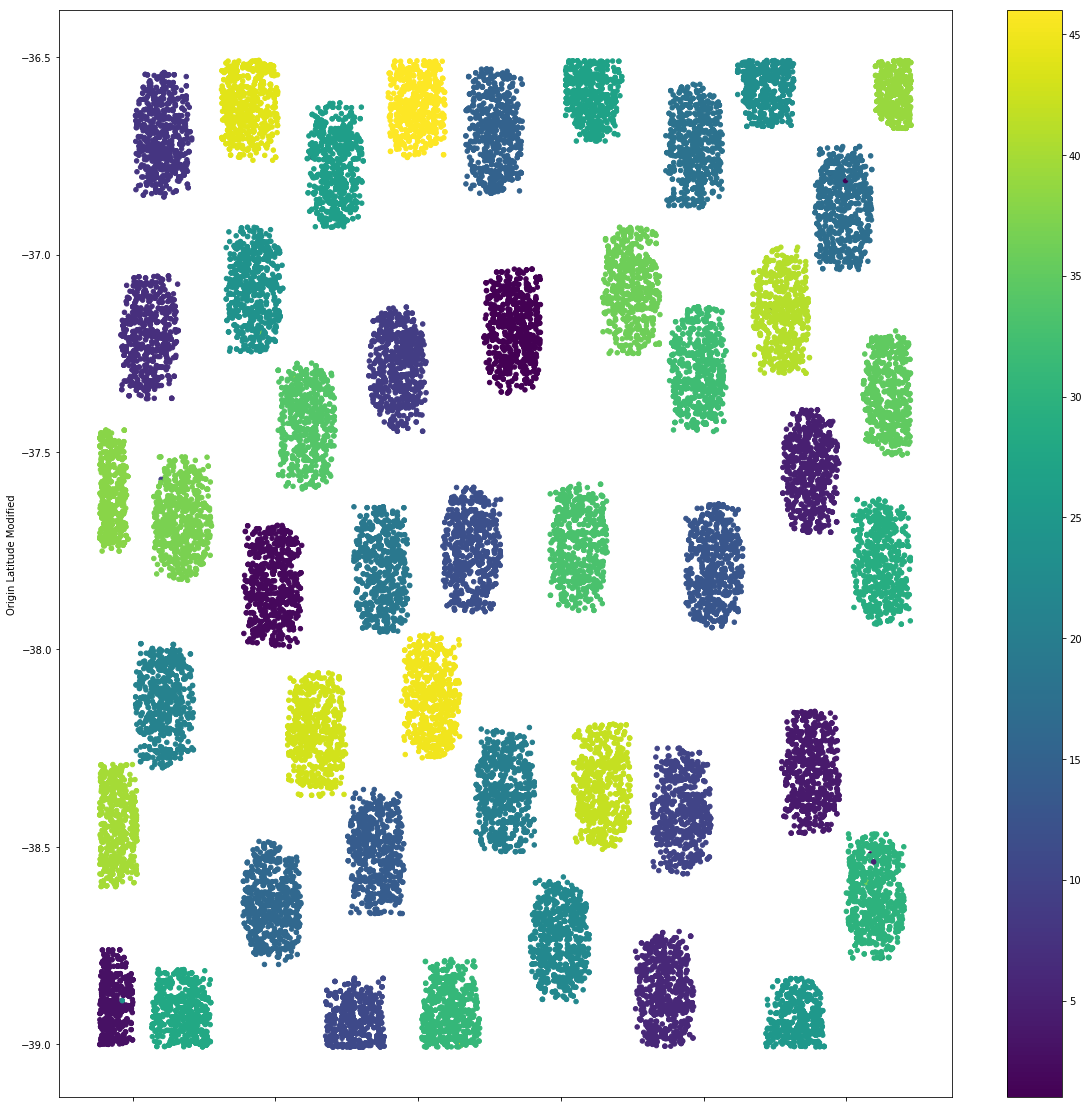

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
drone_data_df.plot.scatter(x='Origin Longitude Modified',y='Origin Latitude Modified' ,figsize=(20,20),c = drone_data_df['Origin Region'].values,colormap='viridis')

### Applying K-Means Clustering on Origin Latitude and Longitudes
#### Preparing Data for K-Means
The below code prepares two input arrays for K-Means -
* **origin_points:** This array holds the full list of Latitudes and Longitudes for Origin region.
* **origin_centers:** This array holds the initial K-Menas centroid Latitude and Longitude

In [41]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
origin_points = drone_data_df[['Origin Latitude Modified', 'Origin Longitude Modified']].values

origin_latitude_mean = drone_data_df.groupby('Origin Region')['Origin Latitude Modified'].mean().tolist()
origin_longitude_mean = drone_data_df.groupby('Origin Region')['Origin Longitude Modified'].mean().tolist()
origin_centers = np.array(list(zip(origin_latitude_mean, origin_longitude_mean)))

In [42]:
origin_centers

array([[-37.18513397, 145.67572936],
       [-37.84070698, 143.98454629],
       [-38.89326729, 142.86962871],
       [-38.30551161, 147.75178253],
       [-37.54554522, 147.7447161 ],
       [-38.86587526, 146.72707867],
       [-37.20671761, 143.11021056],
       [-36.69875385, 143.20546491],
       [-37.28208995, 144.85685016],
       [-38.4073249 , 146.85820427],
       [-38.93760396, 144.55716917],
       [-37.74566906, 145.37245747],
       [-37.79136968, 147.07936014],
       [-38.51326486, 144.70500745],
       [-36.6917007 , 145.53720088],
       [-38.64530934, 143.97350601],
       [-36.88042887, 147.97492774],
       [-36.72663671, 146.94005676],
       [-37.79287721, 144.75215433],
       [-38.36001377, 145.61346976],
       [-38.13444027, 143.21566311],
       [-38.73714385, 145.99665275],
       [-36.5820087 , 147.44127644],
       [-37.09004157, 143.84690499],
       [-38.93568527, 147.65924888],
       [-36.77778672, 144.42179166],
       [-36.60254304, 146.20604706],
 

#### Setting the value for K and Training Data Number
The below code sets the value for K and the training data number. Here, the number of K = 46 and Number of Traning Data = 38539.

In [43]:
# Number of clusters
k = len(origin_centers)
# Number of training data
no_of_training_data = origin_points.shape[0]

In [44]:
k
no_of_training_data

38438

#### Setting the Distance Function
Setting the distance function is very important in K-Means. Here, the Haversign formula would be the formula for finding the gradient distance between two points, which is written in **calculate_gradient_distance()** function.

In [45]:
from math import sin, cos, sqrt, atan2, radians, ceil

def calculate_gradient_distance(origin_centers, origin_points):
    # approximate radius of earth in km
    earth_radious = 6378.0

    latitude_1 = radians(origin_centers[0])
    longitude_1 = radians(origin_centers[1])
    latitude_2 = radians(origin_points[0])
    longitude_2 = radians(origin_points[1])

    d_longitute = longitude_2 - longitude_1
    d_latitude = latitude_2 - latitude_1

    temp = sin(d_latitude / 2)**2 + cos(latitude_1) * cos(latitude_2) * sin(d_longitute / 2)**2
    centroid = 2 * atan2(sqrt(temp), sqrt(1 - temp))
    
    distance = earth_radious * centroid
    distance = round(distance, 3)
    
    return distance


#### Run K-Means Alorithm to find Modified Centres
The below section of code runs the K-Means algorithm to build the initial model, which provides the final set of centroids, which can be used to accumulate the regions.

In [46]:
# When, after an update, the estimate of that center stays the same, exit loop
centers_old = np.zeros(origin_centers.shape) # to store old centers
centers_new = deepcopy(origin_centers) # Store new centers

#data.shape
clusters = np.zeros(no_of_training_data)
distances = np.zeros((no_of_training_data,k))

error = np.linalg.norm(centers_new - centers_old)
error

1019.7803486324897

In [47]:
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    distance = []
    for i in range(no_of_training_data):
        interim_distance = []
        for j in range(k):
            interim_distance.append(calculate_gradient_distance(origin_centers[j], origin_points[i]))
        distance.append(interim_distance)
    # Assign all training data to closest center
    clusters = np.argmin(np.array(distance), axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(origin_points[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[-37.1860305 , 145.67472448],
       [-37.83863818, 143.98020888],
       [-38.89333296, 142.8697308 ],
       [-38.30495906, 147.75121706],
       [-37.54438713, 147.74419548],
       [-38.8658117 , 146.72695092],
       [-37.20671761, 143.11021056],
       [-36.69875385, 143.20546491],
       [-37.28174088, 144.85886504],
       [-38.41091538, 146.85616872],
       [-38.93752681, 144.55721384],
       [-37.74440378, 145.37097704],
       [-37.79136968, 147.07936014],
       [-38.51325138, 144.70511512],
       [-36.6917007 , 145.53720088],
       [-38.64530934, 143.97350601],
       [-36.88024745, 147.97485011],
       [-36.7239951 , 146.93907414],
       [-37.79438518, 144.74853514],
       [-38.36004026, 145.61343985],
       [-38.13444027, 143.21566311],
       [-38.73725316, 145.99652758],
       [-36.58063389, 147.44068895],
       [-37.08799948, 143.8480866 ],
       [-38.93574665, 147.66171153],
       [-36.77775625, 144.42158568],
       [-36.60026251, 146.20774317],
 

In [48]:
distance

[[211.336,
  121.015,
  142.252,
  288.47,
  317.88,
  192.204,
  219.975,
  265.218,
  176.804,
  209.987,
  10.914,
  143.877,
  253.283,
  40.809,
  256.352,
  51.685,
  374.969,
  318.411,
  119.204,
  110.234,
  137.848,
  129.57,
  360.777,
  204.019,
  273.034,
  230.438,
  291.036,
  100.822,
  347.236,
  320.95,
  61.513,
  275.736,
  187.359,
  160.104,
  370.461,
  261.987,
  165.747,
  200.231,
  420.484,
  147.731,
  326.256,
  164.167,
  72.888,
  255.371,
  95.208,
  251.283],
 [17.589,
  149.372,
  295.486,
  233.892,
  203.633,
  213.895,
  210.152,
  210.351,
  55.797,
  179.779,
  208.233,
  59.952,
  155.118,
  159.89,
  58.357,
  207.113,
  224.686,
  140.67,
  91.059,
  128.106,
  224.323,
  175.493,
  188.173,
  145.609,
  270.494,
  105.927,
  93.814,
  266.061,
  252.025,
  285.2,
  190.891,
  131.746,
  81.181,
  113.794,
  249.284,
  90.509,
  195.949,
  236.082,
  264.07,
  265.724,
  182.97,
  144.657,
  153.385,
  163.816,
  106.862,
  78.817],
 [292.959,


#### Accumulating the Clusters
The below code accumulates the points for each and every centroids, creating the clusters

In [49]:
origin_points = origin_points.tolist()

final_clusters = []
for i in range(len(centers_new)):
    final_clusters.append([])
final_clusters

for i in range(len(distance)):
    index = distance[i].index(min(distance[i]))
    final_clusters[index].append(origin_points[i])

final_clusters

[[[-37.2139893, 145.4806925],
  [-37.109259, 145.502587],
  [-37.1619747, 145.52717880000003],
  [-37.17143179999999, 145.70206000000002],
  [-37.259869099999996, 145.6848334],
  [-37.2210399, 145.7763698],
  [-37.0559544, 145.85087019999997],
  [-37.246949799999996, 145.6444869],
  [-37.0838326, 145.7803178],
  [-37.2683896, 145.7630369],
  [-37.2491098, 145.49803300000002],
  [-37.083479700000005, 145.6112071],
  [-37.1338789, 145.7536696],
  [-37.2738217, 145.6531799],
  [-37.3151025, 145.7603681],
  [-37.1541161, 145.6029348],
  [-37.074571500000005, 145.6368971],
  [-37.0751053, 145.7044261],
  [-37.1337529, 145.7647486],
  [-37.1619747, 145.52717880000003],
  [-37.1147904, 145.64914869999998],
  [-37.2678407, 145.584499],
  [-37.1263011, 145.59662780000002],
  [-37.2065669, 145.7351014],
  [-37.1717145, 145.5327623],
  [-37.325696, 145.78322690000002],
  [-37.0963158, 145.7180121],
  [-37.118754700000004, 145.6619177],
  [-37.2750952, 145.78616709999997],
  [-37.2835516, 145.6102

In [50]:
len(final_clusters)

46

### Impute the New values of Region Codes in 'Origin Region Modified' column
The below code creates a new column **'Origin Region Modified'** for the modified values of Region Codes and it also imputes the null values with zeros in **'Origin Region'** column.

In [51]:
    drone_data_df['Origin Region'].fillna(0, inplace=True)
    drone_data_df['Origin Region'].fillna(0, inplace=True)
    drone_data_df['Origin Region Modified'] = drone_data_df['Origin Region'].copy()

The below code updates the new region codes in **'Origin Region Modified'** column

In [52]:
from collections import Counter
import operator
import operator
origin_region_list = []
correct_region = 0.00
for outer_item in final_clusters:
    origin_region_list = []
    origin_region_dict = {}
    for inner_item in outer_item:
        #print('Doing for: ' + str(inner_item[0]) + ' and ' + str(inner_item[1]))
        origin_region = drone_data_df[(drone_data_df['Origin Latitude'] == inner_item[0]) & (drone_data_df['Origin Longitude'] == inner_item[1])]['Origin Region'].tolist()
        origin_region_list += origin_region
    origin_region_dict = dict(Counter(origin_region_list))
    correct_region = max(origin_region_dict, key=origin_region_dict.get)
    print(origin_region_dict)
    print(correct_region)
            
    for inner_item in outer_item:
        drone_data_df.ix[(drone_data_df['Origin Latitude'] == inner_item[0]) & (drone_data_df['Origin Longitude'] == inner_item[1]), ['Origin Region Modified']] = correct_region
    
#    maxmimum = max(origin_region_dict.iteritems(), key=operator.itemgetter(1))[0]

{1.0: 1987}
1.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


{2.0: 1777}
2.0
{0.0: 3, 24.0: 3, 3.0: 2686}
3.0
{4.0: 1967}
4.0
{5.0: 1777}
5.0
{12.0: 1, 6.0: 1750}
6.0
{7.0: 1949}
7.0
{8.0: 1612}
8.0
{9.0: 1718}
9.0
{10.0: 1620}
10.0
{0.0: 3, 11.0: 2728}
11.0
{12.0: 1902}
12.0
{13.0: 1749}
13.0
{27.0: 2, 14.0: 1803}
14.0
{15.0: 1910}
15.0
{16.0: 1848}
16.0
{17.0: 1989, 10.0: 6, 1.0: 1}
17.0
{18.0: 1791}
18.0
{19.0: 1661}
19.0
{0.0: 7, 20.0: 1863}
20.0
{21.0: 1806}
21.0
{25.0: 1, 22.0: 1929}
22.0
{0.0: 6, 19.0: 3, 23.0: 2455}
23.0
{24.0: 1804, 36.0: 2}
24.0
{25.0: 2188, 18.0: 1}
25.0
{1.0: 1, 26.0: 1663}
26.0
{27.0: 2113}
27.0
{2.0: 5, 28.0: 2159}
28.0
{0.0: 1, 29.0: 1608, 23.0: 1}
29.0
{4.0: 2, 2.0: 1, 36.0: 2, 5.0: 1, 30.0: 2005}
30.0
{0.0: 5, 43.0: 3, 31.0: 2046}
31.0
{32.0: 1783}
32.0
{33.0: 1652}
33.0
{0.0: 2, 41.0: 3, 34.0: 1926}
34.0
{35.0: 1975}
35.0
{36.0: 1831}
36.0
{9.0: 1, 37.0: 1844}
37.0
{38.0: 2660}
38.0
{39.0: 3279}
39.0
{40.0: 2528, 0.0: 6}
40.0
{41.0: 1847, 10.0: 3}
41.0
{42.0: 1606}
42.0
{43.0: 1825}
43.0
{44.0: 2113}
44.0
{45.0

As we can see that 30 wrong region codes have been corrected

In [53]:
drone_data_df[drone_data_df['Origin Region Modified'] != drone_data_df['Origin Region']][['Origin Region Modified', 'Origin Region']].count()

Origin Region Modified    30
Origin Region             30
dtype: int64

### Fiding if the Outliers in Origin Region are Gone
We now check whether the outliers in the **'Origin Region'** with the corrected Latitude and Logitude values are gone or not and the below map suggests that they are gone.

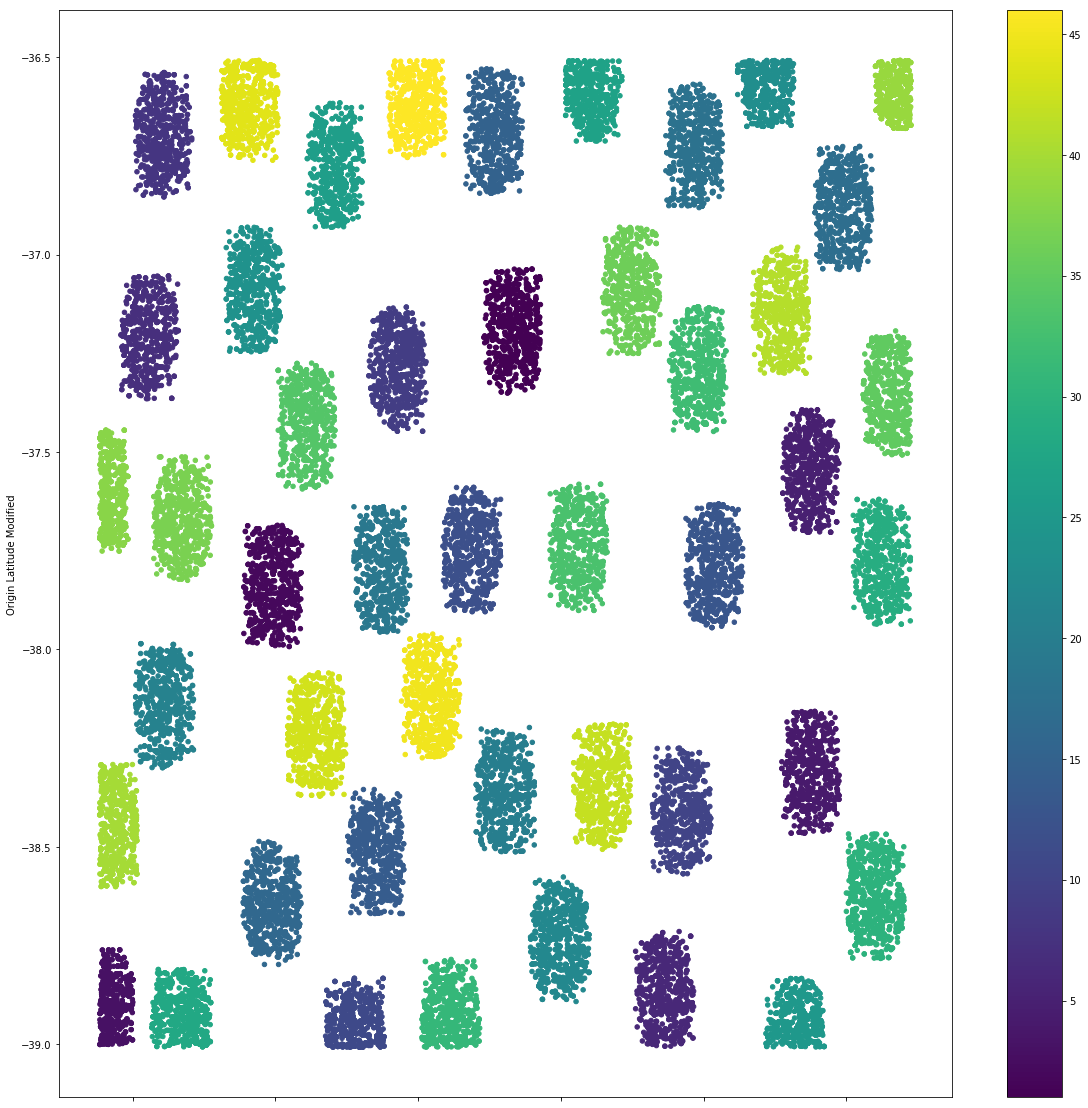

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
drone_data_df.plot.scatter(x='Origin Longitude Modified',y='Origin Latitude Modified' ,figsize=(20,20),c = drone_data_df['Origin Region Modified'].values,colormap='viridis')

## Destination Region Correction Analysis and Possible Correction

### Fiding the Outliers in Destination Region
First we check the outliers in the **'Destination Region'** with the corrected Latitude and Logitude values. If we plot a scatter map, then the wrong regions are clearly visible. Please, find below map for reference.

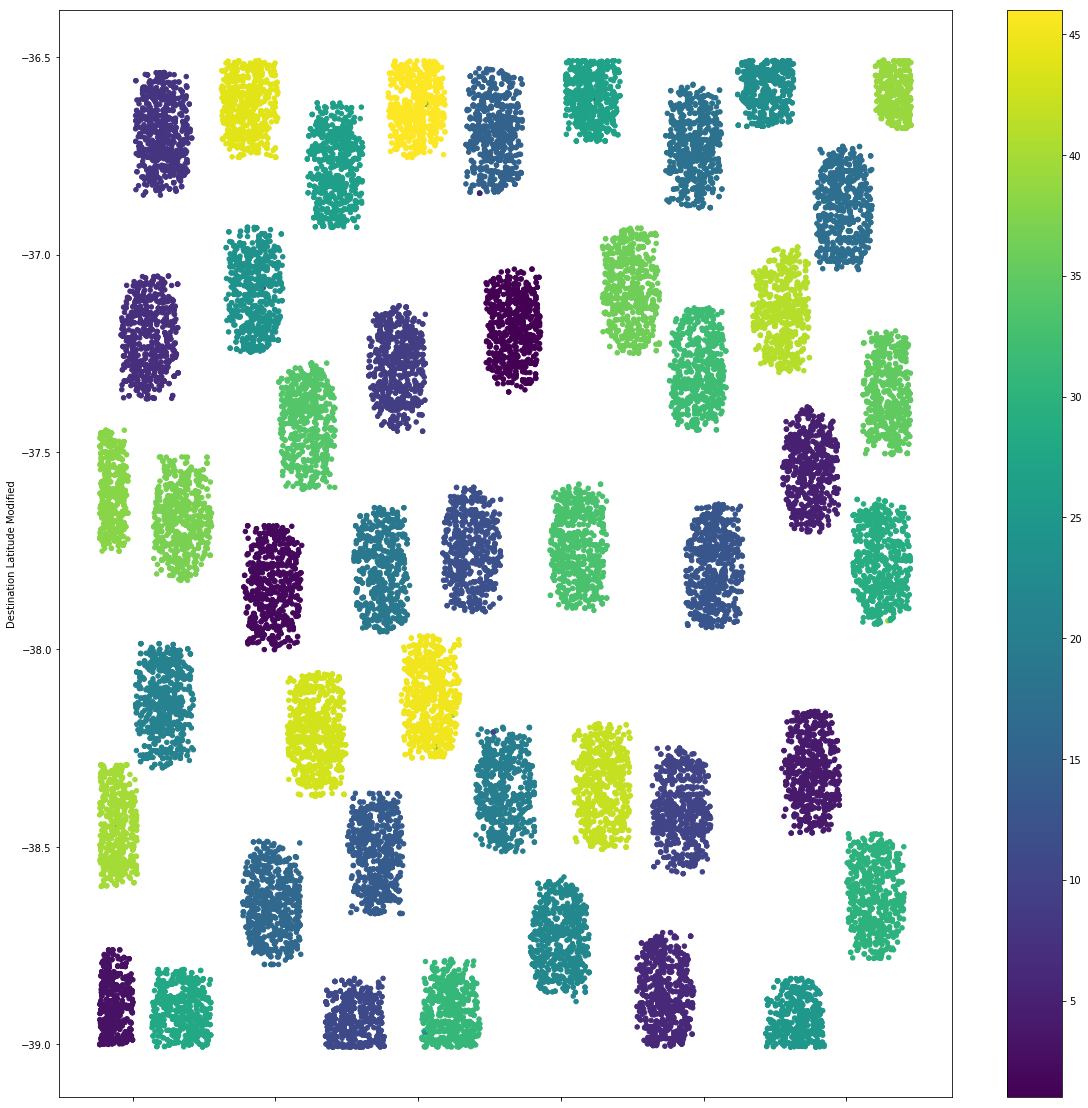

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
drone_data_df.plot.scatter(x='Destination Longitude Modified',y='Destination Latitude Modified' ,figsize=(20,20),c = drone_data_df['Destination Region'].values,colormap='viridis')

### Applying K-Means Clustering on Destination Latitude and Longitudes
#### Preparing Data for K-Means
The below code prepares two input arrays for K-Means -
* **destination_points:** This array holds the full list of Latitudes and Longitudes for Destination region.
* **destination_centers:** This array holds the initial K-Menas centroid Latitude and Longitude


In [56]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
destination_points = drone_data_df[['Destination Latitude Modified', 'Destination Longitude Modified']].values

destination_latitude_mean = drone_data_df.groupby('Destination Region')['Destination Latitude Modified'].mean().tolist()
destination_longitude_mean = drone_data_df.groupby('Destination Region')['Destination Longitude Modified'].mean().tolist()
destination_centers = np.array(list(zip(destination_latitude_mean, destination_longitude_mean)))

#### Setting the value for K and Training Data Number
The below code sets the value for K and the training data number. Here, the number of K = 46 and Number of Traning Data = 38539.

In [57]:
# Number of clusters
k = len(destination_centers)
# Number of training data
no_of_training_data = destination_points.shape[0]

#### Setting the Distance Function
Setting the distance function is very important in K-Means. Here, the Haversign formula would be the formula for finding the gradient distance between two points, which is written in **calculate_gradient_distance()** function.

In [58]:
from math import sin, cos, sqrt, atan2, radians, ceil

def calculate_gradient_distance_d(destination_centers, destination_points):
    # approximate radius of earth in km
    earth_radious = 6378.0

    latitude_1 = radians(destination_centers[0])
    longitude_1 = radians(destination_centers[1])
    latitude_2 = radians(destination_points[0])
    longitude_2 = radians(destination_points[1])

    d_longitute = longitude_2 - longitude_1
    d_latitude = latitude_2 - latitude_1

    temp = sin(d_latitude / 2)**2 + cos(latitude_1) * cos(latitude_2) * sin(d_longitute / 2)**2
    centroid = 2 * atan2(sqrt(temp), sqrt(1 - temp))
    
    distance = earth_radious * centroid
    distance = round(distance, 3)
    
    return distance

#### Run K-Means Alorithm to find Modified Centres
The below section of code runs the K-Means algorithm to build the initial model, which provides the final set of centroids, which can be used to accumulate the regions.

In [59]:
# When, after an update, the estimate of that center stays the same, exit loop
centers_old = np.zeros(destination_centers.shape) # to store old centers
centers_new = deepcopy(destination_centers) # Store new centers

#data.shape
clusters = np.zeros(no_of_training_data)
distances = np.zeros((no_of_training_data,k))

error = np.linalg.norm(centers_new - centers_old)

while error != 0:
    # Measure the distance to every center
    distance = []
    for i in range(no_of_training_data):
        interim_distance = []
        for j in range(k):
            interim_distance.append(calculate_gradient_distance_d(destination_centers[j], destination_points[i]))
        distance.append(interim_distance)
    # Assign all training data to closest center
    clusters = np.argmin(np.array(distance), axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(destination_points[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new


array([[-37.18364432, 145.6731186 ],
       [-37.83996721, 143.98383639],
       [-38.89763532, 142.87096342],
       [-38.30845168, 147.75634227],
       [-37.54302186, 147.74280059],
       [-38.86917163, 146.73049405],
       [-37.21391565, 143.11091223],
       [-36.69395432, 143.20918111],
       [-37.2817135 , 144.85847563],
       [-38.40648512, 146.85244824],
       [-38.93564698, 144.55473745],
       [-37.74470984, 145.36803872],
       [-37.7915055 , 147.07309886],
       [-38.517811  , 144.71038735],
       [-36.69331556, 145.5342527 ],
       [-38.64858871, 143.97792979],
       [-36.878959  , 147.9802756 ],
       [-36.73032798, 146.93357981],
       [-37.79590865, 144.75282156],
       [-38.3586715 , 145.60386864],
       [-38.13043484, 143.21879704],
       [-38.73497694, 145.99823656],
       [-36.58235733, 147.44434059],
       [-37.09502897, 143.85869545],
       [-38.93691365, 147.65140971],
       [-36.77646622, 144.4205794 ],
       [-36.60129553, 146.20860999],
 

#### Accumulating the Cluster
The below code accumulates the points for each and every centroids, creating the clusters

In [60]:
destination_points = destination_points.tolist()

final_clusters = []
for i in range(len(centers_new)):
    final_clusters.append([])
final_clusters

for i in range(len(distance)):
    index = distance[i].index(min(distance[i]))
    final_clusters[index].append(destination_points[i])

final_clusters

[[[-37.2768275, 145.7361955],
  [-37.1477535, 145.5234542],
  [-37.3203841, 145.7357814],
  [-37.114323, 145.5484978],
  [-37.2150453, 145.7619105],
  [-37.17143179999999, 145.70206000000002],
  [-37.1770532, 145.7360066],
  [-37.284421, 145.6752208],
  [-37.2710081, 145.548831],
  [-37.19891079999999, 145.5316793],
  [-37.2738217, 145.82308740000002],
  [-37.111817200000004, 145.6351334],
  [-37.1701084, 145.7357814],
  [-37.3100761, 145.5362781],
  [-37.2033134, 145.78616709999997],
  [-37.118754700000004, 145.5707394],
  [-37.249918900000004, 145.5484978],
  [-37.1061834, 145.82535359999997],
  [-37.1034399, 145.5568534],
  [-37.2109946, 145.76023080000002],
  [-37.2849932, 145.50987990000002],
  [-37.2033134, 145.6176574],
  [-37.1619747, 145.7170065],
  [-37.104755100000006, 145.7393118],
  [-37.11038610000001, 145.76104469999999],
  [-37.2379605, 145.8507183],
  [-37.2150453, 145.7619105],
  [-37.270244299999995, 145.6619177],
  [-37.041994200000005, 145.62759590000002],
  [-37.2

### Impute the New values of Region Codes in 'Destination Region Modified' column
The below code creates a new column **'Destination Region Modified'** for the modified values of Region Codes and it also imputes the null values with zeros in **'Destination Region'** column.

In [61]:
drone_data_df['Destination Region'].fillna(0, inplace=True)
drone_data_df['Destination Region Modified'] = drone_data_df['Destination Region'].copy()

The below code updates the new region codes in **'Destination Region Modified'** column

In [62]:
from collections import Counter
import operator
import operator
destination_region_list = []
correct_region = 0.00
for outer_item in final_clusters:
    destination_region_list = []
    destination_region_dict = {}
    for inner_item in outer_item:
        #print('Doing for: ' + str(inner_item[0]) + ' and ' + str(inner_item[1]))
        destination_region = drone_data_df[(drone_data_df['Destination Latitude'] == inner_item[0]) & (drone_data_df['Destination Longitude'] == inner_item[1])]['Destination Region'].tolist()
        destination_region_list += destination_region
    destination_region_dict = dict(Counter(destination_region_list))
    correct_region = max(destination_region_dict, key=destination_region_dict.get)
    print(destination_region_dict)
    print(correct_region)
    
    for inner_item in outer_item:
        drone_data_df.ix[(drone_data_df['Destination Latitude'] == inner_item[0]) & (drone_data_df['Destination Longitude'] == inner_item[1]), ['Destination Region Modified']] = correct_region
    
#    maxmimum = max(origin_region_dict.iteritems(), key=operator.itemgetter(1))[0]


{1.0: 1840}
1.0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


{2.0: 1680}
2.0
{3.0: 2455}
3.0
{32.0: 3, 4.0: 1901}
4.0
{5.0: 1691}
5.0
{0.0: 1, 10.0: 4, 6.0: 1721}
6.0
{7.0: 1852}
7.0
{8.0: 1812}
8.0
{0.0: 2, 9.0: 1760}
9.0
{8.0: 3, 10.0: 1694}
10.0
{11.0: 2543}
11.0
{0.0: 2, 12.0: 1709}
12.0
{13.0: 1824}
13.0
{14.0: 2114}
14.0
{5.0: 4, 15.0: 1852}
15.0
{16.0: 1961}
16.0
{17.0: 1755}
17.0
{18.0: 1761}
18.0
{19.0: 1912}
19.0
{10.0: 3, 20.0: 1741}
20.0
{21.0: 1947}
21.0
{22.0: 1703}
22.0
{23.0: 2380}
23.0
{24.0: 1756, 34.0: 1, 10.0: 4}
24.0
{25.0: 2672, 13.0: 4}
25.0
{26.0: 1957}
26.0
{27.0: 2186, 5.0: 2}
27.0
{28.0: 2299}
28.0
{29.0: 1811, 39.0: 1}
29.0
{30.0: 1798}
30.0
{31.0: 2059, 23.0: 3}
31.0
{32.0: 1698}
32.0
{33.0: 1776, 38.0: 2, 23.0: 3}
33.0
{34.0: 1983}
34.0
{35.0: 1721, 37.0: 3}
35.0
{0.0: 3, 36.0: 1886}
36.0
{37.0: 1923}
37.0
{0.0: 4, 38.0: 2629, 7.0: 4}
38.0
{0.0: 2, 39.0: 3063}
39.0
{40.0: 2152, 0.0: 4, 22.0: 2}
40.0
{41.0: 1825}
41.0
{42.0: 1665}
42.0
{43.0: 1968}
43.0
{44.0: 1777}
44.0
{0.0: 3, 27.0: 1, 45.0: 2007, 38.0: 2}
45.0
{0

As we can see that 30 wrong region codes have been corrected

In [63]:
drone_data_df[drone_data_df['Destination Region Modified'] != drone_data_df['Destination Region']][['Destination Region Modified', 'Destination Region']].count()

Destination Region Modified    29
Destination Region             29
dtype: int64

### Fiding if the Outliers in Origin Region are Gone
We now check whether the outliers in the **'Destination Region'** with the corrected Latitude and Logitude values are gone or not and the below map suggests that they are gone.

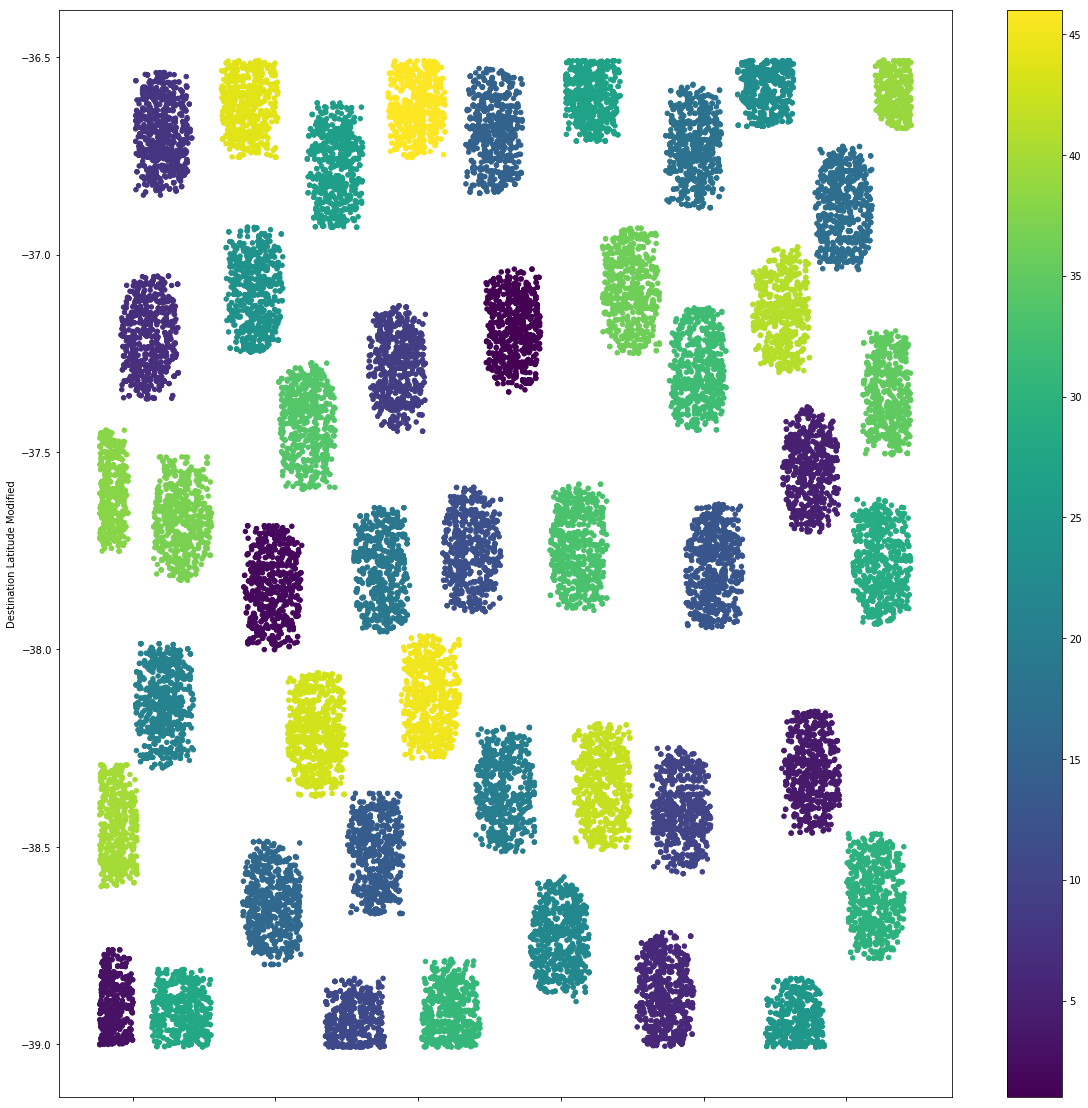

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
drone_data_df.plot.scatter(x='Destination Longitude Modified',y='Destination Latitude Modified' ,figsize=(20,20),c = drone_data_df['Destination Region Modified'].values,colormap='viridis')

## Post Type Analysis and Possible Correction

Apparently there is no value that can figure out the correlation between **'Post Type'** and any other field, but if we take a closer look, then we can see a strong correlation between the 3rd character of 'Id' and the **'Post Type'**. Let's first extract the 3rd character of the **'Id'** column and let's make a new column name **'Id Subset'**.

In [65]:
def id_substr(row):
    return int(row['Id'][2:3])

In [66]:
drone_data_df['Id Subset'] = drone_data_df.apply(id_substr, axis = 1)

Now we see the correlation of **'Post Type'** with other columns with the below code -

In [67]:
drone_data_df.corr()['Post Type']

Drone Type                       -0.001119
Post Type                         1.000000
Package Weight                    0.000611
Origin Region                    -0.011569
Destination Region                0.003474
Origin Latitude                  -0.000603
Origin Longitude                  0.002193
Destination Latitude             -0.003317
Destination Longitude             0.002738
Journey Distance                 -0.008630
Travel Time                      -0.009150
Delivery Fare                     0.289732
Estimated Travel Time            -0.008645
Travel Time in Hours             -0.008645
Travel Time Modified             -0.008645
Origin Latitude Modified          0.003783
Origin Longitude Modified        -0.000565
Destination Longitude Modified    0.001740
Destination Latitude Modified    -0.002861
Journey Distance Modified        -0.008629
Origin Region Modified           -0.011055
Destination Region Modified       0.003371
Id Subset                         0.997508
Name: Post 

As anticipated, there exists a very high corelation between the 3rd characer of **'Id'** and **'Post Type'** and we can see that for third characer of **'Id' = 5**, the **'Post Type is 1'** and for **'Id' = 1*, the **'Post Type is 0'**. So we can make the change accordingly

In [68]:
def correct_post_type(row):
    if str(row['Id']).startswith('ID5') == True:
        post_type = 1.0
    else:
        post_type = 0.0
#     else:
#         post_type = row['Post Type']
    return post_type

In [69]:
drone_data_df['Post Type Modified'] = drone_data_df.apply(correct_post_type, axis=1)

Aswe can see that 60 values have experience changes and they are stored into **'Post Type Modified'** field

In [70]:
drone_data_df[drone_data_df['Post Type'] != drone_data_df['Post Type Modified']][['Post Type', 'Post Type Modified']].count()

Post Type             40
Post Type Modified    60
dtype: int64

In [71]:
drone_data_df['Post Type Modified'].unique()
#drone_data_df['Id'].isnull().sum()

array([1., 0.])

## Drone Type Analysis and Possible Correction

Now comes the most important and challenging part of this task i.e finding the incorrect values of **'Drone Type'**. As mentioned in the assignment statement, each and every drone has three different speeds -
* Take Off Speed
* Landing 
* On Route Speed

Out of these three, the 1st two speeds last for 10 minutes of the total Travel Time. It is assumed that for a given drone type, the the above three will be constant. Now, TakeOff speed and Landing speed will continue for 5 minutes each for every drone type. So the formula, says that the On **Route Travel Time** can be calculated from the below formula -

**'Journey Distance Modified' - beta / Average speed of Derone 1 + 10**

Accordingly, the **On Route Drone Speed** can be calculated from the below formula -

**(Travel Distance 1 - Travel Distance 2)/(Velocity Coefficient 1 - Velocity Coefficient 2)b]**

### Calculating The Derone's On Route Speed for each type
In order to apply this formula, we need to take out two random samples of rows for each and every drone type and then calculate the Drone speeds for each type of Drone. This sampling would be good if we randomely take 10000 rows of each type of Drone and calculate the Drone Speed and then take the median of them. Likewise we can get the below three speeds of Drones of each type.

In [72]:
drone_data_df_d1 = drone_data_df[drone_data_df['Drone Type'] == 1.0]
drone_data_df_d2 = drone_data_df[drone_data_df['Drone Type'] == 2.0]
drone_data_df_d3 = drone_data_df[drone_data_df['Drone Type'] == 3.0]

In [73]:
import numpy as np
def find_avg_speed_drone_type(drone_data_df_dn):
    sample_velocity_list = []
    #for sample in range(100000):
    for sample in range(10000):
        sample_df = drone_data_df_dn.sample(n=2)
        vel_coff_list = sample_df['Travel Time'].tolist()
        vel_coff_1 = vel_coff_list[0] - 10
        vel_coff_2 = vel_coff_list[1] - 10
        distance_list = sample_df['Journey Distance Modified'].tolist()
        distance_1 = distance_list[0]
        distance_2 = distance_list[1]
        if (vel_coff_1 - vel_coff_2) != 0.0:
            sample_velocity_list.append((distance_1 - distance_2)/(vel_coff_1 - vel_coff_2))
    return np.median(sample_velocity_list)

So we can see that with 10000 samples we can get the below On Route speed values for each Drone Type.

In [74]:
d1_avg_speed = find_avg_speed_drone_type(drone_data_df_d1)
d1_avg_speed

1.0333333333333334

In [75]:
d2_avg_speed = find_avg_speed_drone_type(drone_data_df_d2)
d2_avg_speed

1.2166666666666666

In [76]:
d3_avg_speed = find_avg_speed_drone_type(drone_data_df_d3)
d3_avg_speed

1.2166666666666666

### Calculating the TakeOFF and Landing Speed Beta
From the above three values of On Route Speeds for each Drone Type, the below values of TakeOff and Landing Speeds or Beta can be calculated with the below formula -

**('Journey Distance' - 'Total Travel Travel Time' - 10) * OnRoute Speed of Drone type**

In [77]:
takeoff_land_speed_d1 = 3.1160698378
takeoff_land_speed_d2 = 3.6639329
takeoff_land_speed_d3 = 3.8348762377

### Calculating The Travel Time for Each Drone Type
Now from the above OnRoute Speeds of each Drone Type and TakeOff and Landing speeds, the Travel Time for each drone type for a given distance can be calculated from the below formula - 

**'Journey Distance Modified' - beta / Average speed of Derone 1 + 10**

In [78]:
def travel_time_d1(row):
    return ((row['Journey Distance Modified'] - takeoff_land_speed_d1) / d1_avg_speed) + 10
def travel_time_d2(row):
    return ((row['Journey Distance Modified'] - takeoff_land_speed_d2) / d2_avg_speed) + 10
def travel_time_d3(row):
    return ((row['Journey Distance Modified'] - takeoff_land_speed_d3) / d3_avg_speed) + 10

In [79]:
drone_data_df['Travel Time Drone 1'] = drone_data_df.apply(travel_time_d1, axis = 1)
drone_data_df['Travel Time Drone 2'] = drone_data_df.apply(travel_time_d2, axis = 1)
drone_data_df['Travel Time Drone 3'] = drone_data_df.apply(travel_time_d3, axis = 1)

### Determining Drone Type for Each rows
Now once the Travel times for three different drone types of each row are calculated, these three separate travel times are compared with the original given **'Time Time'** and for the nearest travel time among the three, the corresponding **'Drone Type'** is awarded to that particular row. The below code does the corresponding Travel time calculation and the assignment of Drone Types.

In [80]:
temp_list = []
travel_time_zero_lst = []
travel_time_diff = []
travel_time_no_diff = []
def determine_drone_type(row):
    
    travel_time_list = []
    travel_time_d1 = ((row['Journey Distance Modified'] - takeoff_land_speed_d1) / d1_avg_speed) + 10
    travel_time_d2 = ((row['Journey Distance Modified'] - takeoff_land_speed_d2) / d2_avg_speed) + 10
    travel_time_d3 = ((row['Journey Distance Modified'] - takeoff_land_speed_d3) / d3_avg_speed) + 10
    t1 = abs(travel_time_d1 - row['Travel Time'])
    t2 = abs(travel_time_d2 - row['Travel Time'])
    t3 = abs(travel_time_d3 - row['Travel Time'])
    travel_time_list.append(abs(travel_time_d1 - row['Travel Time']))
    travel_time_list.append(abs(travel_time_d2 - row['Travel Time']))
    travel_time_list.append(abs(travel_time_d3 - row['Travel Time']))
    
    min_travel_time_index = travel_time_list.index(min(travel_time_list))
    if row['Travel Time'] > 10:
        if abs(row['Travel Time'] - row['Travel Time Modified']) == 0:
            if min_travel_time_index == 0 and row['Drone Type'] != 1.0:
                drone_type = 1.0
                temp_list.append(drone_type)
                travel_time_no_diff.append([row['Id'], row['Travel Time'], t1, t2, t3])
            elif min_travel_time_index == 1 and row['Drone Type'] != 2.0:
                drone_type = 2.0
                temp_list.append(drone_type)
                travel_time_no_diff.append([row['Id'], row['Travel Time'], t1, t2, t3])
            elif min_travel_time_index == 2 and row['Drone Type'] != 3.0:
                drone_type = 3.0
                temp_list.append(drone_type)
                travel_time_no_diff.append([row['Id'], row['Travel Time'], t1, t2, t3])
            else:
                drone_type = row['Drone Type']
     #           travel_time_no_diff.append(row)
    #         temp_list.append(drone_type)
        else:
            if min_travel_time_index == 0 and row['Drone Type'] != 1.0:
                drone_type = 1.0
                temp_list.append(drone_type)
                travel_time_diff.append(row['Id'])
            elif min_travel_time_index == 1 and row['Drone Type'] != 2.0:
                drone_type = 2.0
                temp_list.append(drone_type)
                travel_time_diff.append(row['Id'])
            elif min_travel_time_index == 2 and row['Drone Type'] != 3.0:
                drone_type = 3.0
                temp_list.append(drone_type)
                travel_time_diff.append(row['Id'])
            else:
                drone_type = row['Drone Type']
#                travel_time_diff.append(row)
#                 temp_list.append(drone_type)
    else:
        drone_type = row['Drone Type']
        travel_time_zero_lst.append(row['Id'])
    return drone_type

In [81]:
drone_data_df['Drone Type Modified'] = drone_data_df.apply(determine_drone_type, axis = 1)

So finally we can see that total 65 drone types are being changed including imputation of 10 null values.

In [82]:
drone_data_df[drone_data_df['Drone Type'] != drone_data_df['Drone Type Modified']][['Drone Type', 'Drone Type Modified']].count()

Drone Type             55
Drone Type Modified    65
dtype: int64

# More Analysis on Travel Time and Possible Correction

From the above value imputation for **'Drone Type'**, it is quite evident that all the given **'Travel Time'** are correctly matched with the travel time of either of the three Drone Types. Only the **'Travel Time'** below 10 including zeros are not considered for the above imputation because take off and landing speed take minimum of 10 mins. For these rows, the estimated travel time for already existing drone type is 1st calculated and compared with original travel time, if there is a mismatch, then the original travel time is changed.

In [83]:
def change_travel_time(row):
    if row['Travel Time'] <= 10:
        if row['Drone Type Modified'] == 1.0:
            travel_time = ((row['Journey Distance Modified'] - takeoff_land_speed_d1) / d1_avg_speed) + 10
        elif row['Drone Type Modified'] == 2.0:
            travel_time = ((row['Journey Distance Modified'] - takeoff_land_speed_d2) / d2_avg_speed) + 10
        else:
            travel_time = ((row['Journey Distance Modified'] - takeoff_land_speed_d3) / d3_avg_speed) + 10
            
        if abs(row['Travel Time'] - travel_time) <= 0.1:
            travel_time = row['Travel Time']
        else:
            travel_time = round(travel_time, 2)
    else:
        travel_time = row['Travel Time']
    return travel_time

In [84]:
drone_data_df['Travel Time Modified 2'] = drone_data_df.apply(change_travel_time, axis = 1)
drone_data_df[(drone_data_df['Travel Time Modified 2'] != drone_data_df['Travel Time'])][['Travel Time Modified 2', 'Travel Time']]

Travel Time Modified 2  Travel Time
1721                   388.80          0.0
3428                    46.00          0.0
4181                   122.37          0.0
4190                   200.42          0.0
4511                   368.08          0.0
4534                    76.54          0.0
6214                    50.80          0.0
8198                   341.52          0.0
8301                   229.76          0.0
10697                  245.49          0.0
12378                  321.63          0.0
12396                  185.90          0.0
12712                  222.10          0.0
12724                  145.30          0.0
14417                  403.12          0.0
14428                  216.05          0.0
14691                  194.97          0.0
14758                  132.83          0.0
16114                  320.58          0.0
18163                  187.71          0.0
18523                  346.34          0.0
20583                  239.97          0.0
20911                  109.52          0.0
20931                  276.23          0.0
22606                  169.87          0.0
24647                  340.16          0.0
25003                  333.57          0.0
26717                  228.09          0.0
27049                  223.11          0.0
29091                  382.32          0.0
30792                   49.11          0.0
30808                  198.58          0.0
30830                  203.44          0.0
31154                  177.63          0.0
32840                  389.09          0.0
33201                  364.35          0.0
33865                  338.03          0.0
35264                  157.57          0.0
37304                   41.65          0.0
37590                  227.68          0.0

In [85]:
def change_travel_time_final(row):
    if  abs(row['Travel Time Modified'] - row['Travel Time Modified 2']) <= 0.2:
        return round(row['Travel Time Modified'], 2)
    else:
        return round(row['Travel Time Modified 2'], 2)

In [86]:
drone_data_df['Travel Time Modified 2'] = drone_data_df.apply(change_travel_time_final, axis = 1)

## Analysis Delivery Time and Possible Correction
The below code finally checks the time gap between **'Travel Time Modified'** column and **'Travel Time Modified 2'** column. if there is a precision of 0.5 gap, then the final Travel time remain unchanged, but in those cases where the gap is out of that range, the Delivery time is modified and placed in **'Delivery Time Modified'** column.

In [87]:
import datetime
from datetime import datetime  
from datetime import timedelta 
def change_delivery_time(row):
    if  abs(row['Travel Time Modified'] - row['Travel Time Modified 2']) > 0:
        int_ttm = int(round(row['Travel Time Modified 2']))
        delivery_time = pd.to_datetime(row['Departure Date Time'], format='%Y-%m-%d %H:%M:%S') + timedelta(minutes=int_ttm)
        delivery_time = delivery_time.time()
    else:
        delivery_time = row['Delivery Time']
    return delivery_time

In [88]:
drone_data_df['Delivery Time Modified'] = drone_data_df.apply(change_delivery_time, axis = 1)

In [89]:
drone_data_df[drone_data_df['Delivery Time Modified'] != drone_data_df['Delivery Time']]['Delivery Time Modified'].count()

20

## Delivery Fare Analysis and Possible Changes
### Calculating Time Of Day
The final part of this project is **'Delivery Fare'** analysis. We don't directly know that on which parameters the Delivery Fare is depending upon. For that we need to find correlation of **'Delivery Fare'** with all other rows. But before that, because we are now interested to calculate **'Time Of Day'** column. The below function calculated the Time Of Day.

In [90]:
from datetime import datetime, timedelta
def change_time_to_sec(time):
    dt = datetime.strptime(time, '%H:%M:%S')
    delta = timedelta(hours=dt.hour, minutes=dt.minute, seconds=dt.second)
    return delta.total_seconds()

In [91]:
def calculate_time_of_day(row):
    if change_time_to_sec(row['Departure Time']) >= change_time_to_sec('06:00:00') and change_time_to_sec(row['Departure Time']) <= change_time_to_sec('11:59:59'):
        time_of_day = 1
    elif change_time_to_sec(row['Departure Time']) >= change_time_to_sec('12:00:00') and change_time_to_sec(row['Departure Time']) <= change_time_to_sec('20:59:59'):
        time_of_day = 2
    else:
        time_of_day = 3
    return time_of_day

In [92]:
drone_data_df['Time Of Day'] = drone_data_df.apply(calculate_time_of_day, axis = 1)

### Cleaning The Unnecessary Columns
Before we do anything with the **'Delivery Fare'**, we need to get rid of the unnecessary columns of the dataframe. We rename the temporary columns to indicate that they are currently holding the final values.

In [93]:
drone_data_df_new = drone_data_df[['Id','Drone Type Modified','Post Type Modified', 'Package Weight', 'Origin Region Modified', 'Destination Region Modified', 'Origin Latitude Modified', 'Origin Longitude Modified', 'Destination Latitude Modified', 'Destination Longitude Modified', 'Journey Distance Modified', 'Departure Date', 'Departure Time Modified', 'Travel Time Modified 2', 'Delivery Time Modified', 'Time Of Day', 'Delivery Fare']]
drone_data_df_new.columns

Index(['Id', 'Drone Type Modified', 'Post Type Modified', 'Package Weight',
       'Origin Region Modified', 'Destination Region Modified',
       'Origin Latitude Modified', 'Origin Longitude Modified',
       'Destination Latitude Modified', 'Destination Longitude Modified',
       'Journey Distance Modified', 'Departure Date',
       'Departure Time Modified', 'Travel Time Modified 2',
       'Delivery Time Modified', 'Time Of Day', 'Delivery Fare'],
      dtype='object')

In [94]:
drone_data_df_new.rename(columns = {'Drone Type Modified':'Drone Type', 'Post Type Modified':'Post Type', 'Origin Region Modified':'Origin Region', 'Destination Region Modified':'Destination Region', 'Origin Latitude Modified':'Origin Latitude', 'Origin Longitude Modified':'Origin Longitude', 'Destination Latitude Modified':'Destination Latitude', 'Destination Longitude Modified':'Destination Longitude', 'Journey Distance Modified':'Journey Distance', 'Departure Time Modified': 'Departure Time', 'Travel Time Modified 2':'Travel Time','Delivery Time Modified':'Delivery Time'}, inplace=True)
drone_data_df_new.columns

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Time Of Day', 'Delivery Fare'],
      dtype='object')

### Finding the Correlation of Other Columns with the 'Devivery Fare'
Now because all the unnecessary rows are now cleaned, We can now find the correlation among **'Delivery Fare'** and other columns.

In [95]:
drone_data_df_new.corr()['Delivery Fare']

Drone Type               0.441907
Post Type                0.289445
Package Weight           0.179701
Origin Region            0.002370
Destination Region       0.006037
Origin Latitude          0.002503
Origin Longitude         0.004022
Destination Latitude    -0.007793
Destination Longitude    0.002553
Journey Distance         0.172023
Travel Time              0.109203
Time Of Day              0.206231
Delivery Fare            1.000000
Name: Delivery Fare, dtype: float64

We can see that Five colums among 16 are highly correlated with the other columns and these are **'Drone Type'**, **'Post Type'**, **'Package Weight'**, **'Journey Distance'**, and **'Time Of Day'**. So according to me, thse columns can be the predictior of **'Delivery Fare'** in given combination. Taking the columns with **'Delivery Time'** for our model.

In [96]:
drone_data_df_temp = drone_data_df_new[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "Time Of Day", "Delivery Fare"]]
drone_data_df_temp.describe()

Drone Type     Post Type  Package Weight  Journey Distance  \
count  38438.000000  38438.000000    38438.000000      38438.000000   
mean       1.702066      0.297362       23.753531        219.113241   
std        0.777845      0.457103       10.939393        114.281403   
min        1.000000      0.000000        5.000000          0.668000   
25%        1.000000      0.000000       14.344000        130.234750   
50%        2.000000      0.000000       23.619000        208.077000   
75%        2.000000      1.000000       33.018250        296.446750   
max        3.000000      1.000000       51.980000        565.300000   

        Time Of Day  Delivery Fare  
count  38438.000000   38408.000000  
mean       2.123420     146.934151  
std        0.782654      62.207857  
min        1.000000      63.740000  
25%        1.000000     114.840000  
50%        2.000000     140.615000  
75%        3.000000     168.120000  
max        3.000000    1358.660000

### Building the Linear Regression Model
Because all predictors are numerical continuous and caregorical variables, so a Linear regression model model would be the best to impute values in the **'Delivery Fare'** field. The below code generates the linear model for **'Delivery Fare'**.

In [97]:
#df_1[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "time of day"]]
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
%matplotlib inline
#print(test_model1.count())
test_model = drone_data_df_temp[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "Time Of Day", "Delivery Fare"]][drone_data_df_new["Package Weight"] < 45]
test_model1 = test_model.copy()
test_model1.dropna(inplace=True)
print(test_model1.count())

X_train, X_test, y_train, y_test= train_test_split(test_model1.iloc[:,:-1], test_model1.iloc[:,-1:], random_state=111)

#map(pd.np.shape,[X_train, y_train])

lm_for_impute = LinearRegression()

lm_for_impute.fit(X_train, y_train)


#drone_data_df_new['Delivery Fare'][drone_data_df_new['Delivery Fare'].isnull()] = lm_for_impute.predict(test_model.drop(['Delivery Fare'], axis=1))

Drone Type          38022
Post Type           38022
Package Weight      38022
Journey Distance    38022
Time Of Day         38022
Delivery Fare       38022
dtype: int64


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

If we check the R-Squared value of the model we get **0.9916502318424449**, which is a real good fit.

In [98]:
lm_for_impute.score(X_test, y_test)

0.9916502318424449

Below is the mean square value for the model, which is **11.125985261992286**, a very good value for linear regression.

In [99]:
from sklearn.metrics import mean_squared_error
y_pred = lm_for_impute.predict(X_test)
mean_squared_error(y_test, y_pred)

11.125985261992286

### Finding And Removing Outliers
Despite of this very good model, we still see the below outliers in the linear model, which we need to get rid of. 

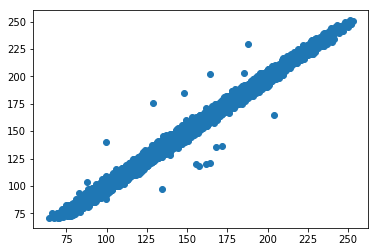

In [100]:
plt.scatter(y_test,y_pred)

In order to do this, we should calculate the **'Residual Error'** of each and every row to get the distance of a given point from the regression line. In order to do that, we need to predict **'Delivery Fare'** on the given columns for the missing values. The below code does that.

In [101]:
drone_data_df_new['Predicted Delivery Fare'] = lm_for_impute.predict(drone_data_df_new[["Drone Type", "Post Type", "Package Weight", "Journey Distance", "Time Of Day"]])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


We have observed from the data that the value package weight is highly impertially impacting the data when the package weight becomes more than 45, so the package weight more than 45 is an outlier here.

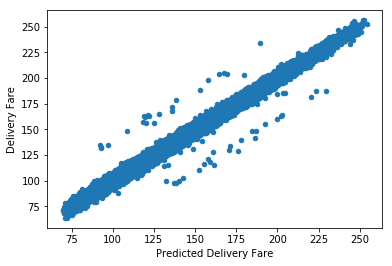

In [102]:
drone_data_df_new[drone_data_df_new['Package Weight'] < 45].plot.scatter(x='Predicted Delivery Fare', y='Delivery Fare')

The below code estimates the **'Residual Error'** which is used in the later stage to find the outliers and remove them. We also see that for even pac kage weight < 45, the residual error value is very highh. So we also include those data into out outliers and handle them accordingly.

In [103]:
drone_data_df_new['error'] = abs(drone_data_df_new['Delivery Fare'] - drone_data_df_new['Predicted Delivery Fare'])**2

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
drone_data_df_new[drone_data_df_new['Package Weight'] < 45]['error'].sort_values(ascending = False).head(50)

1313     2187.367841
33286    2165.548381
14843    2017.757229
10761    1992.699994
34905    1968.119828
29191    1826.390059
10771    1783.715950
2635     1764.755992
21000    1761.517707
29243    1747.147489
2597     1689.502731
10740    1677.396450
4677     1671.188453
2620     1655.066340
16138    1646.219900
524      1632.769778
16946    1630.990623
24331    1604.870001
37387    1596.140763
4656     1572.698414
21273    1562.365960
31284    1551.673124
23066    1547.277483
35359    1522.636007
10669    1518.995822
4640     1517.703713
18526    1512.912988
27215    1503.888793
37253    1492.097356
29668    1481.759485
10937    1479.145632
36815    1441.660462
37414    1390.085949
24540    1382.979740
31267    1366.584293
851      1357.322483
37406    1340.264148
25146    1324.497663
14862    1308.712921
21240    1276.916410
11080    1267.382162
9014     1214.223255
18863    1196.105076
10737    1076.573533
6653     1072.051251
23695    1026.932369
34609     945.412349
2867      548

In [140]:
drone_data_df_new1 = drone_data_df_new.drop(drone_data_df_new[(drone_data_df_new['error'] > 350) & (drone_data_df_new['Package Weight'] < 45)].index, inplace=False, axis = 0)

In [141]:
drone_data_df_new1['Delivery Fare Copy'] = drone_data_df_new1['Delivery Fare'].copy()

Finally, after removing the outliers, we find a very good model as shown below.

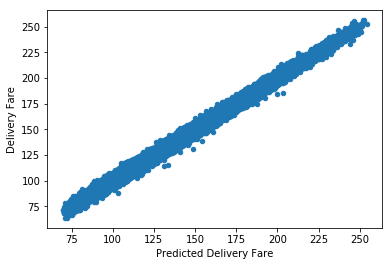

In [142]:
drone_data_df_new1[drone_data_df_new1['Package Weight'] < 45].plot.scatter(x='Predicted Delivery Fare', y='Delivery Fare')

In [143]:
drone_data_df_new1.loc[drone_data_df_new1['Delivery Fare'].isnull(),'Delivery Fare'] = round(drone_data_df_new1['Predicted Delivery Fare'], 2)

# Output Generation
After all the Data cleaning, the formats of the values are corrected, the redundant columns are dropped and the output file is finally generated.

In [145]:
drone_data_df_new1.drop(['Time Of Day'], axis = 1, inplace=True)
drone_data_df_new1.drop(['Predicted Delivery Fare'], axis = 1, inplace=True)
drone_data_df_new1.drop(['Delivery Fare Copy'], axis = 1, inplace=True)
drone_data_df_new1.drop(['error'], axis = 1, inplace=True)

In [146]:
def rounding_off_pkg_wt(row):
    return round(row['Package Weight'], 3)
def rounding_off_origin_latitude(row):
    return round(row['Origin Latitude'], 7)
def rounding_off_origin_longitude(row):
    return round(row['Origin Longitude'], 7)
def rounding_off_dest_latitude(row):
    return round(row['Destination Latitude'], 7)
def rounding_off_dest_longitude(row):
    return round(row['Destination Longitude'], 7)
def rounding_off_journey_dist(row):
    return round(row['Journey Distance'], 3)

drone_data_df_new1['Package Weight'] = drone_data_df_new1.apply(rounding_off_pkg_wt, axis = 1)
drone_data_df_new1['Origin Latitude'] = drone_data_df_new1.apply(rounding_off_origin_latitude, axis = 1)
drone_data_df_new1['Origin Longitude'] = drone_data_df_new1.apply(rounding_off_origin_longitude, axis = 1)
drone_data_df_new1['Destination Latitude'] = drone_data_df_new1.apply(rounding_off_dest_latitude, axis = 1)
drone_data_df_new1['Destination Longitude'] = drone_data_df_new1.apply(rounding_off_dest_longitude, axis = 1)
drone_data_df_new1['Journey Distance'] = drone_data_df_new1.apply(rounding_off_journey_dist, axis = 1)



In [147]:
drone_data_df_new1.to_csv('Final_Cleaned_Data.csv', index = False)